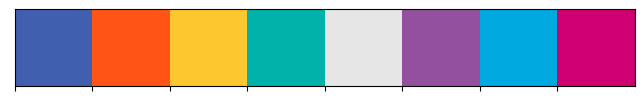

In [1]:
import pandas as pd
import numpy as np
import os
import re
import datetime


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable

sns.color_palette()
#use html color codes
cdt = ['#4060AF', '#FF5416', '#FDC82F', '#00B2A9', '#E7E6E6', '#93509E', '#00A9E0', '#CF0071']
sns.palplot(sns.color_palette(cdt))
sns.set_palette(cdt)
custom = ListedColormap(sns.color_palette(cdt))

colors = ['#22335C', '#00B2A9', '#FDC82F']
custom_colormap = LinearSegmentedColormap.from_list('custom_colormap', colors)

dfs = {}
path = '../data/n_st_csv_22_23/'
for file in os.listdir(path):
    df = pd.read_csv(path + file)
    parts = re.split(r"[-.]", file) # extracts the date from the file name
    date = f'{parts[-3]}-{parts[-2]}'
    dfs[date] = df # stores each month as a dictionary entry

In [2]:
locations = {key: value['location'] for key, value in dfs.items()}

In [3]:
concat_df = pd.concat([df.assign(key=key) for key, df in dfs.items()])

concat_df[['date', 'time']] = concat_df['dt'].str.split(' ', expand=True)

concat_df['dt'] = pd.to_datetime(concat_df['dt'])
concat_df['date'] = pd.to_datetime(concat_df['date'])
concat_df['time'] = pd.to_datetime(concat_df['time'], format='%H:%M:%S').dt.time
concat_df['year-month-day-hour'] = concat_df['dt'].dt.strftime('%Y-%m-%d %H')
concat_df['year-month-hour'] = concat_df['dt'].dt.strftime('%Y-%m %H')
concat_df['month-hour'] = concat_df['dt'].dt.strftime('%m %H')
concat_df['hour'] = concat_df['dt'].dt.hour
concat_df['month'] = concat_df['date'].dt.month
concat_df['quarter'] = concat_df['date'].dt.quarter
concat_df['year-month'] = concat_df['dt'].dt.strftime('%Y-%m')
concat_df['year-week'] = concat_df['date'].dt.strftime('%Y-%U')
concat_df['year-quarter'] = concat_df['dt'].apply(lambda x: f"{x.year}-{(x.month - 1) // 3 + 1}")
concat_df['day_of_week'] = concat_df['date'].dt.day_name()

concat_df = concat_df[(concat_df['location'] == 'NclNorthumberlandStSavilleRowEast') | (concat_df['location'] == 'NclNorthumberlandStSavilleRowWest')]
east_df = concat_df[(concat_df['location'] == 'NclNorthumberlandStSavilleRowEast')]
west_df = concat_df[(concat_df['location'] == 'NclNorthumberlandStSavilleRowWest')]